# PIVOTSPORT
## Unsupervised Learning (Clustering)
## Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline



# Load the wholesale customers dataset
try:
    data = pd.read_csv("AggregatedData.csv")
    data.drop(['UserId', 'Age', 'AgeRange', 'Gender', 'Country', 'Region', 'EngagementNumberOfVisits', 'ComputedEngagementNumberOfVisits', 'EngagementDurationOfVisit', 'EngagementSessionsOnMatchDays', 'EngagementSessionsOnNonMatchDays', 'ContentVideoMinutes', 'ContentNewsArticlesMinutes', 'ContentECommerceMinutes', 'ContentGamesMinutes', 'VideoTypeShortVideosMinutes', 'VideoTypeLongVideosMinutes', 'VideoContentMatchHighlightsMinutes', 'VideoContentSkillsTechnicalMinutes', 'VideoContentInterviewsMinutes', 'VideoContentFunBehindTheScenesMinutes', 'PreferencesPlayerAMinutes', 'PreferencesPlayerBMinutes', 'PreferencesPlayerCMinutes'], axis = 1, inplace = True)
    print("Customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Customers dataset has 50000 samples with 3 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe())

,ECommerceTickets,ECommerceMechandise,ECommerceSubscription
count,50000.000000,50000.000000,50000.000000
mean,20.676755,12.675048,2.116790
std,6.987020,5.150767,0.630296
min,2.400000,0.910000,0.260000
25%,16.200000,8.920000,1.700000
50%,20.120000,11.520000,2.060000
75%,24.190000,15.780000,2.450000
max,65.780000,33.490000,6.110000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,ECommerceTickets,ECommerceMechandise,ECommerceSubscription
0,28.29,15.86,2.01
1,21.27,12.55,1.95
2,28.98,21.50,2.04


Chosen samples offset from mean of dataset:


,ECommerceTickets,ECommerceMechandise,ECommerceSubscription
0,7.29,2.86,0.01
1,0.27,-0.45,-0.05
2,7.98,8.50,0.04


Chosen samples offset from median of dataset:


,ECommerceTickets,ECommerceMechandise,ECommerceSubscription
0,8.29,3.86,0.01
1,1.27,0.55,-0.05
2,8.98,9.50,0.04


Quartile Visualization


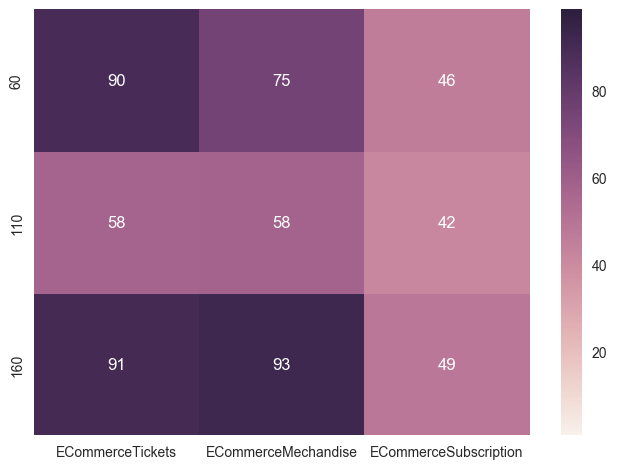

In [7]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [60,110,160]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

print ("Chosen samples offset from mean of dataset:")
display(samples - np.around(data.mean().values))

print ("Chosen samples offset from median of dataset:")
display(samples - np.around(data.median().values))

print ("Quartile Visualization")
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

In general the mean for each feature seems much higher than the median, so this data seems somewhat skewed.<br /><br />
Original Index 60: This customer spent right around the median on fresh food, a little under the median for milk, right around the average amount for grocery, very little on frozen foods (not far above the minimum for the data set), above the 75th percentile on detergents and paper, and below the 25th percentile on delicatessen items. Originally I thought of something like a big box retailer, as the proportional mix feels about right, but the problem I have there is the frozen section seems a bit too small. Then I thought perhaps a restaurant, because having very little frozen food or delicatessen "prepared" items would be consistent with an organization that prides itself on concoting it's meals in house, but the cleaning products seem far out of line, it wouldn't seem you would need a significantly higher than average amount of cleaning and office supplies for a restaurant. Between the 2 I think that the supermarket is more likely.<br /><br />
Original Index 110: This customer is a heavy consumer of Fresh items, is close to the 25th percentile for milk, well below the 25th percentile for Grocery, above the median for frozen, very little on detergents/paper, and close to the 75th percentile on Delicatessan. So lots of fresh, frozen, and prepared items, and only a little detergents. My first thought there is a traditional supermarket, but spending low on grocery items doesn't seem righ t for a grocery store. Perhaps this is the right mix for a mid-level restaurant, since they don't retail any detergent items usually; having a ton of frozen items doesn't seem quite right though. This could actually be something like a tech company, stocking up on perks-style food for their employees (deli items and frozen food are common). The Fresh items being so high is a bit unusual in my experience, but it could be a particularly health-concious organization. What about something like a coffee-shop/cafe? these places often have little in the way of your standard staple groceries, but would have fresh food on hand to make artisan-style dishes, and frozen goods for those who like desert with their coffee, and deli items would be a common offering. I like that one best of the ideas I've had so far.<br /><br />
Original Index 160: This customer buys very little fresh food, a median amount of milk, a huge amount of groceries, 25th percentile of frozen, over the 75th percentile on detergents, and over the 75th percentile for deli foods. Lots of deli foods, groceries and detergent items; little fresh or frozen foods. This could be some kind of entertainment complex with many concession stands; a stadium or something like that. But then again the grocery percentage feels off. It's probably just a grocery store that doesn't carry a great deal of fresh food, like an Aldi's or similar.<br />

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn import tree

In [11]:
ECommerceTickets_array = data['ECommerceTickets']
new_data = data.drop(['ECommerceTickets'],axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, ECommerceTickets_array,test_size=0.25, random_state=29)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(random_state=29)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("Score Is ", score)

Score Is  -0.820805875756


In [12]:
ECommerceMechandise_array = data['ECommerceMechandise']
new_data = data.drop(['ECommerceMechandise'],axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, ECommerceMechandise_array,test_size=0.25, random_state=29)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(random_state=29)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("Score Is ", score)

Score Is  -0.934911176891


In [13]:
ECommerceSubscription_array = data['ECommerceSubscription']
new_data = data.drop(['ECommerceSubscription'],axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, ECommerceSubscription_array,test_size=0.25, random_state=29)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(random_state=29)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("Score Is ", score)

Score Is  -0.773443266374


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I initially selected "Detergents_Paper", because I thought it was kind of the odd one out of the rest of the feature set. The score I came up with was 0.77, which seems like it could be pretty easy to predict, but I wasn't sure how that stacked up to the other features. To find out I extracted each one in turn and found the following scores:<br /><br />
* Detergents -> 0.77
* Frozen -> -3.29
* Fresh -> 0.22
* Milk -> 0.35
* Grocery -> 0.77
* Delicatessen -> 0.39

Based on this it seems that Detergents and Grocery are the least necesary for identifying spending habits, as they are the easiest to predict from the balance of the data.<br />

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

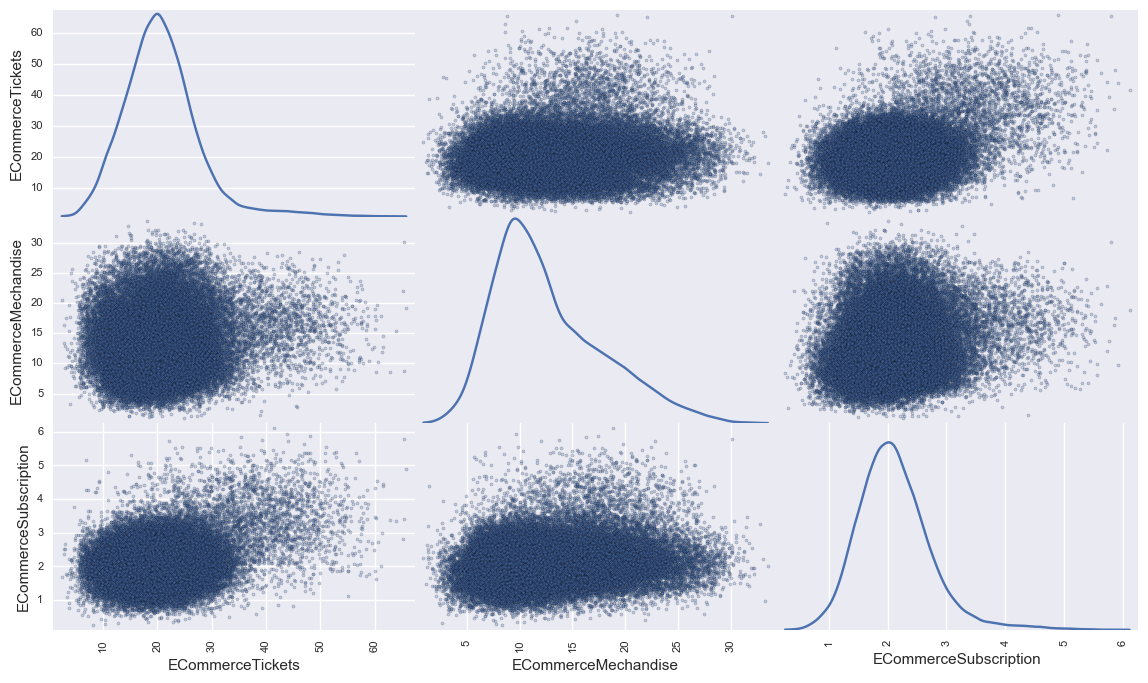

In [14]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Grocery and Detergents_Paper do indeed appear to be at least moderately correlated with one another. This confirms my suspicion that you could get rid of either of them and the other could be reasonably predicted. Milk appeared to have a mild correlation to both Grocery and Detergents_Paper. The distributions for all 6 features appear to be skewed right, perhaps even log normal. All the categories have a great deal of data close to 0 with respect to some of the higher data points, but since there are so few I think we could instead say that there are a high number of outliers.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

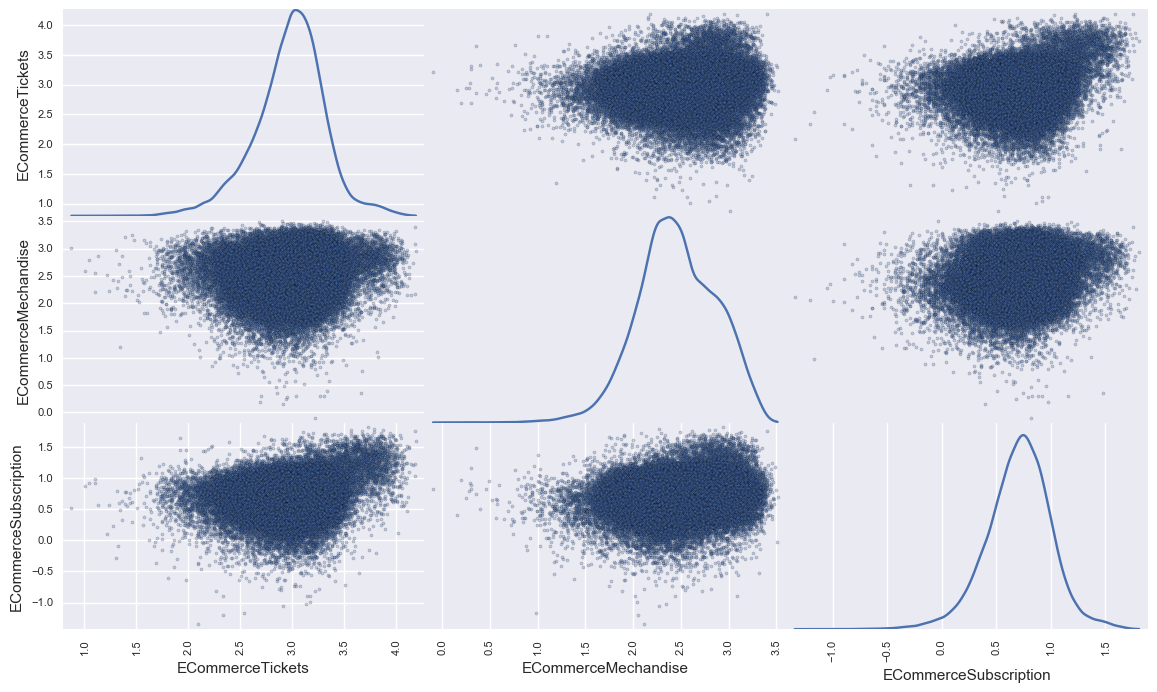

In [15]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [16]:
# Display the log-transformed sample data
display(log_samples)

,ECommerceTickets,ECommerceMechandise,ECommerceSubscription
0,3.342508,2.763800,0.698135
1,3.057298,2.529721,0.667829
2,3.366606,3.068053,0.712950


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [19]:
all_outliers = np.array([], dtype='int64')

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers = np.append(all_outliers, outlier_points.index.values.astype('int64'))
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(outlier_points)

all_outliers, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
outliers = all_outliers[counts>1]

print (outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'ECommerceTickets':


,ECommerceTickets,ECommerceMechandise,ECommerceSubscription
44,1.912501,3.117507,0.500775
45,1.918392,2.474014,0.982078
71,3.854394,2.227862,1.141033
96,1.793425,1.897620,0.824175
109,1.754404,2.337952,0.598837
166,1.890095,3.075005,0.828552
167,1.829376,2.863914,0.371564
180,1.903599,2.972975,0.254642
216,1.987874,2.854745,0.412110
220,2.041220,2.269028,0.598837


Data points considered outliers for the feature 'ECommerceMechandise':


,ECommerceTickets,ECommerceMechandise,ECommerceSubscription
79,2.552565,1.305626,0.854415
133,2.813011,1.297463,0.587787
196,2.696652,1.258461,-0.020203
301,2.613007,1.316408,0.438255
477,3.045474,1.011601,0.928219
777,2.786861,1.311032,0.438255
824,2.254445,0.924259,0.039221
1028,2.416806,1.264127,0.500775
1044,3.050220,1.244155,0.802002
1059,2.317474,1.252763,0.438255


Data points considered outliers for the feature 'ECommerceSubscription':


,ECommerceTickets,ECommerceMechandise,ECommerceSubscription
72,3.738622,2.791778,1.543298
89,3.148024,2.594508,-0.385662
102,2.864484,1.486140,-0.072571
147,2.866193,1.463255,-0.274437
149,3.132446,2.159869,-0.139262
151,3.178054,3.097386,-0.562119
153,2.349469,2.736314,-0.494296
177,3.048325,2.105353,-0.072571
196,2.696652,1.258461,-0.020203
197,3.652993,3.004692,1.562346


[  196   368  1310  1494  1638  1939  2196  2592  2626  2975  3074  3213
  3544  3804  3836  3846  4276  5283  5425  5509  5784  6261  6504  7395
  7592  7783  7981  8007  8185  8326  8443  8547  8679  8871  9174  9715
 10005 10311 10579 10755 10949 11089 11329 11694 12195 12489 12739 12773
 12957 13162 13487 13639 14015 14033 14043 14679 14692 14755 16100 16247
 16297 16499 16755 17032 17406 17603 17880 17898 18179 18313 18527 18732
 18795 18871 19209 19246 19572 20187 20588 20949 21254 21609 22751 23643
 24828 24965 25068 25237 25674 26171 26328 26450 26469 26731 26901 27177
 27440 27559 27584 27632 27920 28057 28128 28255 28305 28920 29443 29588
 30419 30962 31049 31052 31213 31305 32034 32055 32458 32843 33048 33109
 33137 33279 33560 33620 35147 35331 36027 36245 36310 36411 36425 37035
 37179 37578 38238 38497 38829 39440 40237 40285 40337 40510 41791 41841
 41993 42053 42281 42324 42759 42874 42924 43029 43239 43373 44152 44206
 44366 44619 44782 44797 46136 46280 46291 47885 49

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are several data points which are outliers for more than one feature [65, 66, 75, 128, 154]. I believe they should be removed because they represent truly unusual points with respect to the rest of the data, and therefore will be of little use in forming clusters of similar customers.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4744
Dimension 2    0.7937
Dimension 3    1.0000
Name: Explained Variance, dtype: float64


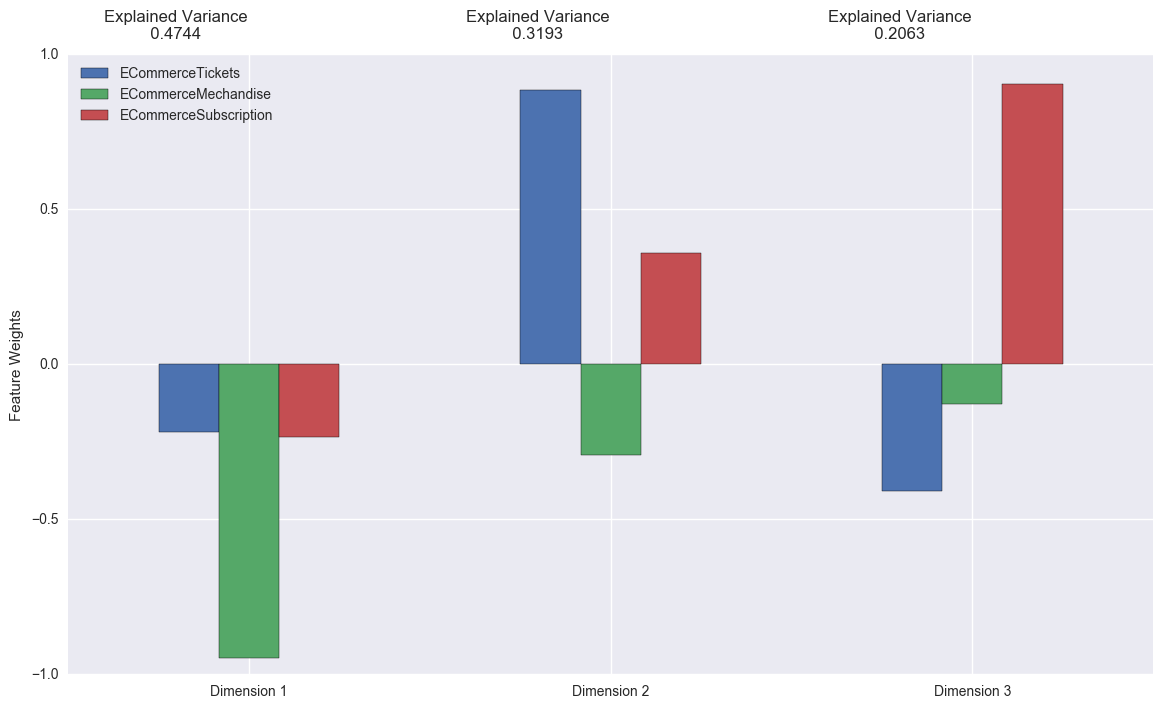

In [22]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=3).fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

# display cumulative variance:
print (pca_results['Explained Variance'].cumsum())

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first principal component explains 44.3% of the variance, and the second principal component is responsible for 26.4%. Together the first 2 account for 70.7% of all variance in the data. When you include the 3rd and 4th principal component (12.3% and 10.1% respectively) we've now accounted for 93.1%. It looks like the first dimension is heavily reliant on Detergents, Grocery, and Milk, which are the 3 features we identified above as being most highly correlated. The second dimension appears to be orthogonal to the first, reducing the impact of Milk, Grocery, and Detergents, and instead relying on variation in Fresh, Frozen, and Deli items. The third dimension appears to be low Fresh spending and high Deli spending, and the 4th is a similar high/low continuum for low Deli, high Frozen.

The 3rd component shows large negative weight for Fresh and large positive weight for Delicatessen.

The component reveals which customers buy little Fresh and a lot of Delicatessen, as well as customers who buy in opposite proportions. This pattern reflects the variation in spending on items that need to be cooked & prepared vs items that are "ready to eat".

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [23]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3
0,-0.3695,0.2359,-0.1978
1,-0.0784,0.0410,-0.0783
2,-0.6665,0.1733,-0.2335


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [24]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [25]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.3695,0.2359
1,-0.0784,0.0410
2,-0.6665,0.1733


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Advantages of K Means clustering:<br /><br />
* With a large number of variables, K-Means may be computationally faster than hierarchical clustering (if K is small).
* K-Means may produce tighter clusters than hierarchical clustering, especially if the clusters are globular.


Advantages of Gaussian Mixture Models (GMM):<br /><br />
* It is the fastest algorithm for learning mixture models
* The GMM algorithm is a good algorithm to use for the classification of static postures and non-temporal pattern recognition.
* Obtain a density estimation for each cluster
Given the small dataset and only two compoments, GMM is a good model to use as we're not concerned with speed and the data intrinsically is not divided by clean and tight categories. Looking at the data, it is also unlikely that we can assume that the components have equal covariances.<br /><br />


Reference:<br /><br />
* [A Tutorial on Clustering Algorithms](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/mixture.html)
* [GMM Classifier](http://www.nickgillian.com/wiki/pmwiki.php/GRT/GMMClassifier)
* [K-Means Clustering Advantages and Disadvantages](http://playwidtech.blogspot.de/2013/02/k-means-clustering-advantages-and.html)

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GMM

for i in range(2, 8):
    clusterer = GMM(i, random_state=62).fit(reduced_data)
    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    #centers = clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print (i, 'clusters:', score.round(5))

#clusterer = KMeans(2, random_state=62).fit(reduced_data)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for i in range(2, 8):
    clusterer = KMeans(i, random_state=62).fit(reduced_data)
    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print (i, 'clusters:', score.round(5))

clusterer = KMeans(2, random_state=62).fit(reduced_data)

2 clusters: 0.35721
3 clusters: 0.34936
4 clusters: 0.32776


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

From the above computation, it appears that two clusters gives us the best sillhouette score of 0.42628.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [ ]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [ ]:
#  TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments

print "Actual cluster centers"
display(true_centers)

good_unscaled_data = data.drop(data.index[outliers]).reset_index(drop = True)
print "mean values"
display(np.around(good_unscaled_data.mean().values))
print "median values"
display(np.around(good_unscaled_data.median().values))

print "Centers offset from mean"
display(true_centers - np.around(good_unscaled_data.mean().values))

print "Centers offset from median"
display(true_centers - np.around(good_unscaled_data.median().values))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

It seems like these segments are divided between those who purchase a lot of fresh and frozen goods, but little detergents or grocery (Segment 1), and those customers which purchase lots of grocery/milk/detergents, some fresh, and some deli (Segment 0).<br /><br />
You can confirm that segment 1 has a high purchasing tendancy for frozen and fresh goods by looking at their relationship to the central values of the original dataset with the outliers removed, especially the median value since the mean is heavily influenced by a few very high purchasers. Segment 1 is above the median in Fresh and Frozen by several hundred units, but below the median values for the whole dataset in detergents and grocery.<br /><br />
Similarly, Segment 0 is thousands of units above the median for grocery, milk, and detergents, but below the median values for fresh and frozen.<br /><br />
Since these are clusters that sort of divide the entirety of wholesale customers in 2, I'd be inclined to make the split between those customer who sell food to consumers to prepare themselves (Segment 0: Grocery stores, supermarkets, etc), and those customers who prepare food to serve to customers (Coffee shops, restaurants, etc).<br /><br />

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [ ]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

**Answer:**

Original Index 60: I originally predicted this was a supermarket, this matches the cluster it has been assigned.<br />
Original Index 110: I thought this would be a coffee-shop/cafe, this is consistent with it's cluster assignment.<br />
Original Index 160: I predicted this point to be a grocery store, once again it matches the cluster assignment.<br />

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Intuitively, I would want to only apply the 3-day per week schedule to Segment 0 customers (food retailing). With less fresh food on hand, and no major events with purchasing spikes like restaurants or hotels, they can probably sustain a less frequent delivery schedule more readily. Segment 1 buys a ton of fresh food, and if they're the kind of customers I think they are they have to ride the waves of event planning which can quickly drain supplies of an in demand item for the evening (plus they'd probably rather be directing their staff to managing customers rather than tending to deliveries in the evening).<br /><br />
However, intuition is often wrong :). We could conduct useful A/B testing of both groups by selecting a small but statistically significant sample of customers from each cluster and using the remainder of their cluster as the control group. We could apply the new 3 day schedule to just the sample for each cluster, and measure how their reported service satsifaction changes with respect to their control groups. This would give us data on how the schedule change affects customers in these 2 seperate categories, which will reveal if the schedule is more helpful/damaging to one group or the other.<br />

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The cluster that we assign them to is in itself a feature, which could be used as an input when predicting other labels like what sort of customer they are or how much of a given category they're likely to purchase.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [ ]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The number of clusters matches the number of channels, so it seems like that's quite relevent and maatches well. although there is some bleed over between the 2 groups in the middle of the distribution, segment 0 in the analysis is clearly "Retail", and segment 1 is clearly "Hotel/Restaurants/Cafes". This reinforces my above speculation about the types of customer in each segment, I believe the algorithm did a reasonable job of clustering these customers according to broad categories of business type.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.